#### Novo Exercicio

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df_teste = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/aug_test.csv')
df_teste.shape
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78273 non-null  int64  
 1   Gender                78273 non-null  object 
 2   Age                   78273 non-null  int64  
 3   Driving_License       78273 non-null  int64  
 4   Region_Code           78273 non-null  float64
 5   Previously_Insured    78273 non-null  int64  
 6   Vehicle_Age           78273 non-null  object 
 7   Vehicle_Damage        78273 non-null  object 
 8   Annual_Premium        78273 non-null  float64
 9   Policy_Sales_Channel  78273 non-null  float64
 10  Vintage               78273 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 6.6+ MB


In [6]:
df_train = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/aug_train.csv')
df_train.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [7]:
df_teste['Response'] = 2
df_full =[df_teste, df_train]
df_full = pd.concat(df_full)


In [8]:
obj = df_full.select_dtypes(include='object').columns
print(obj)

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


In [9]:
#Verificação de Dados Faltantes

df_verificado = df_full.isna().sum()*100/len(df_full)
print(df_verificado)

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


In [10]:
from turtle import title
from pandas_profiling import ProfileReport

profile = ProfileReport(df_full, title='Pandas Profiling Report', explorative=True)

/home/jean/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#profile.to_file('report.html')

In [12]:
#profile.to_widgets()

In [13]:
# Renomeando as Colunas
df_full.columns = ['id', 'genero', 'idade', 'cnh', 'codigo_regiao',
       'segurado_anteriormente', 'idade_veiculo', 'danos_veiculo', 'premio_anual',
       'politica_canal_vendas', 'dias_segurado', 'resposta']

/home/jean/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

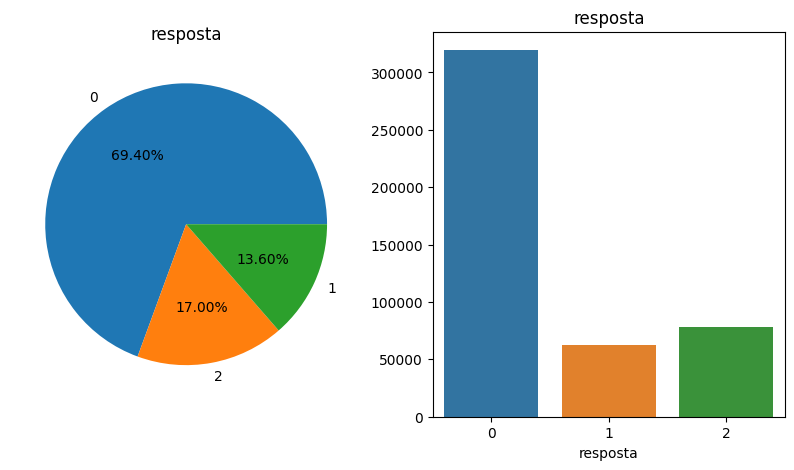

In [14]:
f, ax = plt.subplots(1,2, figsize=(10,5))
df_full['resposta'].value_counts().plot.pie(autopct='%0.2f%%', ax=ax[0])
ax[0].set_title('resposta')
ax[0].set_ylabel('')
sns.countplot('resposta',data=df_full, ax=ax[1])
ax[1].set_title('resposta')
ax[1].set_ylabel('')

#### Transformação do modelo (Engenharia de Recursos)

In [15]:
from sklearn import preprocessing

In [16]:
# Transformando em variaveis categoricas numericas (Label Encoder)

le = preprocessing.LabelEncoder()
df_full['genero'] = le.fit_transform(df_full['genero'])

In [17]:
#Transformando em variaveis categoricas numericas (Cat.code)

df_full['danos_veiculo'] = df_full['danos_veiculo'].astype('category')
df_full['danos_veiculo'] = df_full['danos_veiculo'].cat.codes

In [18]:
df_full['idade_veiculo'].nunique()

3

In [19]:
# Criando variáveis Dummie
# Melhor usado no caso da variavel idade_veiculo por tem 3 valores diferentes
# No caso de 2 variáveis com dois valores LE e Cat.Code entre outras funcionam melhor

df_full = pd.get_dummies(df_full, columns=['idade_veiculo', 'cnh'], drop_first=True)
#df_full = pd.get_dummies(df_full, columns=['idade_veiculo', 'cnh'])



In [20]:
df_full.sample(2)

,id,genero,idade,codigo_regiao,segurado_anteriormente,danos_veiculo,premio_anual,politica_canal_vendas,dias_segurado,resposta,idade_veiculo_< 1 Year,idade_veiculo_> 2 Years,cnh_1
302131,135330,1,56,28.0,0,1,2630.0,156.0,79,0,0,1,1
359306,179306,1,66,28.0,0,1,55978.0,125.0,234,0,0,1,1


In [21]:
#Trabalhando com a variavel dias_segurado

df_full['dias_segurado'].min(), df_full['dias_segurado'].max()

(10, 299)

In [22]:
df_full['meses_segurado'] = round(df_full['dias_segurado']/30)

In [23]:
df_full.set_index('id')

,genero,idade,codigo_regiao,segurado_anteriormente,danos_veiculo,premio_anual,politica_canal_vendas,dias_segurado,resposta,idade_veiculo_< 1 Year,idade_veiculo_> 2 Years,cnh_1,meses_segurado
id,,,,,,,,,,,,,
57782,0,34,39.0,1,0,38244.0,124.0,146,2,0,0,1,5.0
286811,0,55,28.0,0,1,37577.0,122.0,109,2,0,1,1,4.0
117823,1,39,28.0,1,0,24578.0,26.0,63,2,0,0,1,2.0
213992,1,28,50.0,1,0,40507.0,8.0,129,2,0,0,1,4.0
324756,0,24,10.0,0,1,36783.0,152.0,201,2,1,0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164549,1,24,15.0,0,1,23938.0,152.0,105,0,1,0,1,4.0
247064,1,27,28.0,1,0,336395.0,152.0,144,0,1,0,1,5.0
165293,1,45,28.0,0,1,40443.0,26.0,187,0,0,0,1,6.0


In [24]:
# Removendo o resultado 2 da variavel Resposta

df_train = df_full.loc[df_full['resposta'] != 2]
df_test = df_full.loc[df_full['resposta'] == 2]
df_test.drop('resposta', axis=1, inplace=True)

df_train.shape, df_test.shape

/tmp/ipykernel_45775/3107600956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('resposta', axis=1, inplace=True)


((382154, 14), (78273, 13))

#### Treinamento do Modelo

In [25]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (roc_curve,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             precision_score,
                             f1_score)
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [26]:
X = df_train.drop('resposta', axis=1)
y = df_train['resposta']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [28]:
# Random Forest com parametros aleatórios
rf = RandomForestClassifier(n_estimators=3,       # Numero de arvores do algoritmo (padrão 100)
                            max_depth = 2,        # Padrão None, numeros inteiros. profundidade máxima da arvore
                            n_jobs=10,            # Numero de execuções paralelas
                            min_samples_split=10, # Padrão 2, numeros inteiros numero de divisão de um nó
                            min_samples_leaf=4,   # Padrão 1, numeros inteiros. Numero minimo necessário para estar em um nó folha
                            max_features='sqrt')  # “sqrt”, “log2”, None, ou valor inteiro limitado ao numero de features

In [29]:
rf.fit(X_train, y_train) #Treinamento do modelo

RandomForestClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=3, n_jobs=10)

In [30]:
y_pred = rf.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.8344483501530786

In [32]:
recall_score(y_test, y_pred)

0.0

In [33]:
f1_score(y_test, y_pred)

0.0

In [34]:
precision_score(y_test, y_pred)

0.0

## Tuning de Parâmetros

#### Random Search

In [35]:
n_estimator = [1, 50, 100, 150, 200, 250, 300, 400]
min_samples_split = [2, 4, 8, 16]
min_samples_leaf = [1, 2, 4, 8]
max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [2, 4, 6, 8, 10]

# Dicionário com os parametros
rf_params = {
    'n_estimators':n_estimator,
    'min_samples_split': min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_depth':max_depth
}

In [36]:
rf_tuned = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=37), 
                              param_distributions=rf_params, # passagem dos parametros
                              cv=5, # validação cruzada 
                              n_iter=5, # numero de interações
                              scoring='recall', # metrica de avaliação 
                              n_jobs=-1, # uso de processadores
                              verbose=0) # log 

In [37]:
rf_tuned.fit(X_train, y_train)

/home/jean/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/jean/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/jean/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8972149293047355

In [ ]:
recall_score(y_test, y_pred)

0.3791359325605901

In [ ]:
f1_score(y_test, y_pred)

0.5498166259168704

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
print('Melhor número de árvores: {}'.format(rf_tuned.best_params_['n_estimators']))
print('Melhor número número mínimo de amostras necessárias para dividir um nó interno: {}'.format(rf_tuned.best_params_['min_samples_split']))
print('Melhor número mínimo de amostras necessárias para estar em um nó da folha: {}'.format(rf_tuned.best_params_['min_samples_leaf']))
print('Melhor número de variáveis a serem considerados ao procurar a melhor divisão: {}'.format(rf_tuned.best_params_['max_features']))
print('Melhor nível de profundidade máxima da arvore: {}'.format(rf_tuned.best_params_['max_depth']))

Melhor número de árvores: 50
Melhor número número mínimo de amostras necessárias para dividir um nó interno: 16
Melhor número mínimo de amostras necessárias para estar em um nó da folha: 8
Melhor número de variáveis a serem considerados ao procurar a melhor divisão: auto
Melhor nível de profundidade máxima da arvore: 6


In [ ]:
rf_tuned2 = RandomForestClassifier(n_estimators=100,
                                   min_samples_split=16,
                                   min_samples_leaf=8, 
                                   max_features='sqrt',
                                   max_depth=6)

In [ ]:
rf_tuned2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=16)

In [ ]:
y_pred = rf_tuned2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8972149293047355

In [ ]:
recall_score(y_test, y_pred)

0.3791359325605901

In [ ]:
f1_score(y_test, y_pred)

0.5498166259168704

In [ ]:
precision_score(y_test, y_pred)

1.0

#### Salvando o Modelo

In [ ]:
import joblib
# !pip freeze > requirements.txt

In [ ]:
joblib.dump(rf_tuned, '/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/rf_tuned.pkl')
joblib.dump(rf_tuned, '/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/rf_tuned.joblib')

['/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/rf_tuned.joblib']